# Artificial Intelligence
## L2 International, Univ. Bordeaux

### Supervised Learning

Supervised learning is where you have input variables X and an output variable Y and you use an algorithm to learn the mapping function f from the input to the output. Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data x that you can predict the output variables Y for that data.


It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers,
the algorithm iteratively makes predictions on the training data and is corrected by the teacher.


Learning stops when the algorithm achieves an acceptable level of performance.

#### Exercise: k-NN (k Nearest Neighbours) on a Real Dataset
Ref: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space.


1. Import the modules numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Execute the following code and observe what you obtain:

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

ANSWER: (What is the dataset, what are the details available about it and what can it be used to predict (i.e. what could be the Y for the supervised learning we want to do?))

The dataset is used to predict breast cancer based on a number of attributes of the tumor like texture, perimeter, area, smoothness, compactness, concavity etc. The target variable Y would be the class we want to separate the tumors in: benign or malignant.

3. Instead of using the complete dataset we will use just two of the columns from it along with the prediected class. Execute the following code and check what X and y look like.

In [3]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names) # ANSWER in the next
                                                                        #cell what this function does
y = pd.get_dummies(y, drop_first=True)

4. Split the dataset (X, y) into training and test subsets.

Hint: check the use of `sklearn.model_selection.train_test_split`. Also look at the use of the parameter `test_size`. Choose a good split for train and test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

5. Like in the previous labs, use the  `k-NN` model from `sklearn` to train it on the training data

In [6]:
from sklearn.neighbors import KNeighborsClassifier

#initialize the k-NN model
knn = KNeighborsClassifier(n_neighbors=4)

#train the model
knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

6. Use this trained model to `predict` the classes on the test data you have



<Axes: xlabel='mean area', ylabel='mean compactness'>

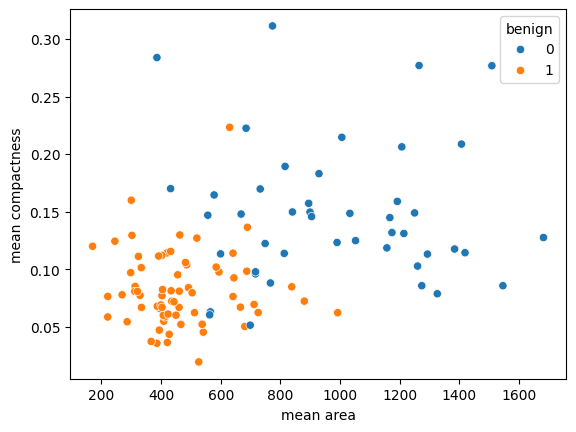

In [10]:
#make predictions
y_pred = knn.predict(X_test)
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

7. Confusion Matrix: Is used to measure the performance of a ML classification model. It could be with 2 classes or more but the table structure follows as shown in the image below

![image.png](attachment:image.png)

It checks what is the predicted class (from the model) and what the **True** i.e. actual class was for a given sample X.

Note: This kind of performance comparison with *predicted* and *true* values on a test set is done in supervised learning. In the unsupervised case we saw previously we **do not** have the *true* values of our data


Check the use of `sklearn.metrics.accuracy_score` and `sklearn.metrics.confusion_matrix` and calculate the accuracy and the confusion matrux of your model on the test data.

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.8421052631578947
Confusion Matrix:
[[38  7]
 [11 58]]


8. Analyse the confusion matrix you get and comment on whether the model has good accuracy or not.

In this confusion matrix:

-the top-left cell represents true negatives: 38 instances were correctly classified as negative (benign tumors)

-the top-right cell represents false positives: 7 instances were incorrectly classified as positive (malignant tumors)

-the bottom-left cell represents false negatives: 11 instances were incorrectly classified as negative (benign tumors)

-the bottom-right cell represents true positives: 58 instances were correctly classified as positive (malignant tumors).

The model correctly identified 38 benign tumors (true negatives) and 58 malignant tumors (true positives).The model incorrectly classified 7 benign tumors as malignant (false positives). The model incorrectly classified 11 malignant tumors as benign (false negatives).

Considering the accuracy, which is approximately 84.21%, we can say that the model has reasonably good accuracy.